# Train model for regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
import scipy
from scipy.stats import pearsonr
import sklearn
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import joblib

## 1. Data pre-processing

In [2]:
# Read train data
df=pd.read_excel("TrainDataset2023.xls")
df.head()

,ID,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,TRG002174,1,144.0,41.0,0,0,0,1,3,3,...,0.517172,0.375126,3.325332,0.002314,3880771.500,473.464852,0.000768,0.182615,0.030508,0.000758
1,TRG002178,0,142.0,39.0,1,1,0,0,3,3,...,0.444391,0.444391,3.032144,0.005612,2372009.744,59.459710,0.004383,0.032012,0.001006,0.003685
2,TRG002204,1,135.0,31.0,0,0,0,1,2,1,...,0.534549,0.534549,2.485848,0.006752,1540027.421,33.935384,0.007584,0.024062,0.000529,0.006447
3,TRG002206,0,12.0,35.0,0,0,0,1,3,3,...,0.506185,0.506185,2.606255,0.003755,6936740.794,46.859265,0.005424,0.013707,0.000178,0.004543
4,TRG002210,0,109.0,61.0,1,0,0,0,2,1,...,0.462282,0.462282,2.809279,0.006521,1265399.054,39.621023,0.006585,0.034148,0.001083,0.005626


In [3]:
# Delete column ID
df.drop('ID', axis=1, inplace=True)
# Delete row with missing RFS outcome value
df.drop(df[df['RelapseFreeSurvival (outcome)'] == 999].index, axis=0, inplace=True)
# Show the data
df.describe()

,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,...,4.000000e+02,4.000000e+02,4.000000e+02,400.000000,4.000000e+02,400.000000,400.000000,400.000000,400.000000,400.000000
mean,12.697500,56.000208,51.804674,0.547500,2.902500,2.797500,2.830000,9.875000,6.562500,8.63250,...,3.957637e-01,3.911005e-01,2.722189e+00,0.003347,5.679717e+07,178.311246,32500.032620,0.056935,0.005965,0.029322
std,111.107417,27.137584,10.948522,0.498362,49.932114,49.937068,49.935558,86.092911,70.444284,86.20034,...,1.666319e-01,1.615922e-01,7.648849e-01,0.002419,7.063846e+08,1045.453432,177545.921568,0.047179,0.008379,0.115915
min,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,...,7.050000e-11,7.050000e-11,-3.200000e-16,0.000008,0.000000e+00,0.000000,0.000248,0.000000,0.000000,0.000000
25%,0.000000,38.000000,44.516769,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.00000,...,3.199017e-01,3.184398e-01,2.340783e+00,0.001389,1.030473e+06,18.760570,0.001826,0.018628,0.000310,0.001464
50%,0.000000,55.000000,51.019507,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.00000,...,4.095627e-01,4.054695e-01,2.814884e+00,0.002944,3.277334e+06,67.929659,0.004383,0.047740,0.002330,0.003276
75%,0.000000,73.000000,60.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.00000,...,5.000049e-01,4.956920e-01,3.304411e+00,0.004798,9.079686e+06,157.370294,0.013769,0.085321,0.007962,0.009479
max,999.000000,144.000000,79.603012,1.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.00000,...,8.773779e-01,8.571429e-01,4.947427e+00,0.011301,1.390001e+10,20764.693790,1000000.000000,0.285100,0.060742,1.145601


In [4]:
# Set RFS outcome to y
y = df['RelapseFreeSurvival (outcome)']

# Delete two outcome columns
df.drop('pCR (outcome)', axis=1, inplace=True)
df.drop('RelapseFreeSurvival (outcome)', axis=1, inplace=True)
df.head()

,Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,TumourStage,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,41.0,0,0,0,1,3,3,1,1,2,...,0.517172,0.375126,3.325332,0.002314,3880771.500,473.464852,0.000768,0.182615,0.030508,0.000758
1,39.0,1,1,0,0,3,3,1,1,2,...,0.444391,0.444391,3.032144,0.005612,2372009.744,59.459710,0.004383,0.032012,0.001006,0.003685
2,31.0,0,0,0,1,2,1,1,0,2,...,0.534549,0.534549,2.485848,0.006752,1540027.421,33.935384,0.007584,0.024062,0.000529,0.006447
3,35.0,0,0,0,1,3,3,1,1,3,...,0.506185,0.506185,2.606255,0.003755,6936740.794,46.859265,0.005424,0.013707,0.000178,0.004543
4,61.0,1,0,0,0,2,1,1,0,2,...,0.462282,0.462282,2.809279,0.006521,1265399.054,39.621023,0.006585,0.034148,0.001083,0.005626


In [5]:
# Replace all the missing value 999 with nan
df.replace(999, np.nan, inplace=True)

# Find the missing columns and print them
for col in df.columns:
    if df[col].isnull().any():
        print(col, 'has missing values')

PgR has missing values
HER2 has missing values
TrippleNegative has missing values
ChemoGrade has missing values
Proliferation has missing values
HistologyType has missing values
LNStatus has missing values


In [6]:
# Using different methods to handle the missing value (mode or median)
df['PgR'] = df['PgR'].fillna(df['PgR'].mode()[0])
df['HER2'] = df['HER2'].fillna(df['HER2'].mode()[0])
df['LNStatus'] = df['LNStatus'].fillna(df['LNStatus'].mode()[0])
df['TrippleNegative'] = df['TrippleNegative'].fillna(df['TrippleNegative'].mode()[0])
df['ChemoGrade'] = df['ChemoGrade'].fillna(df['ChemoGrade'].mode()[0])
df['Proliferation'] = df['Proliferation'].fillna(df['Proliferation'].median())
df['HistologyType'] = df['HistologyType'].fillna(df['HistologyType'].median())

['RFS_power_transformer.pkl']

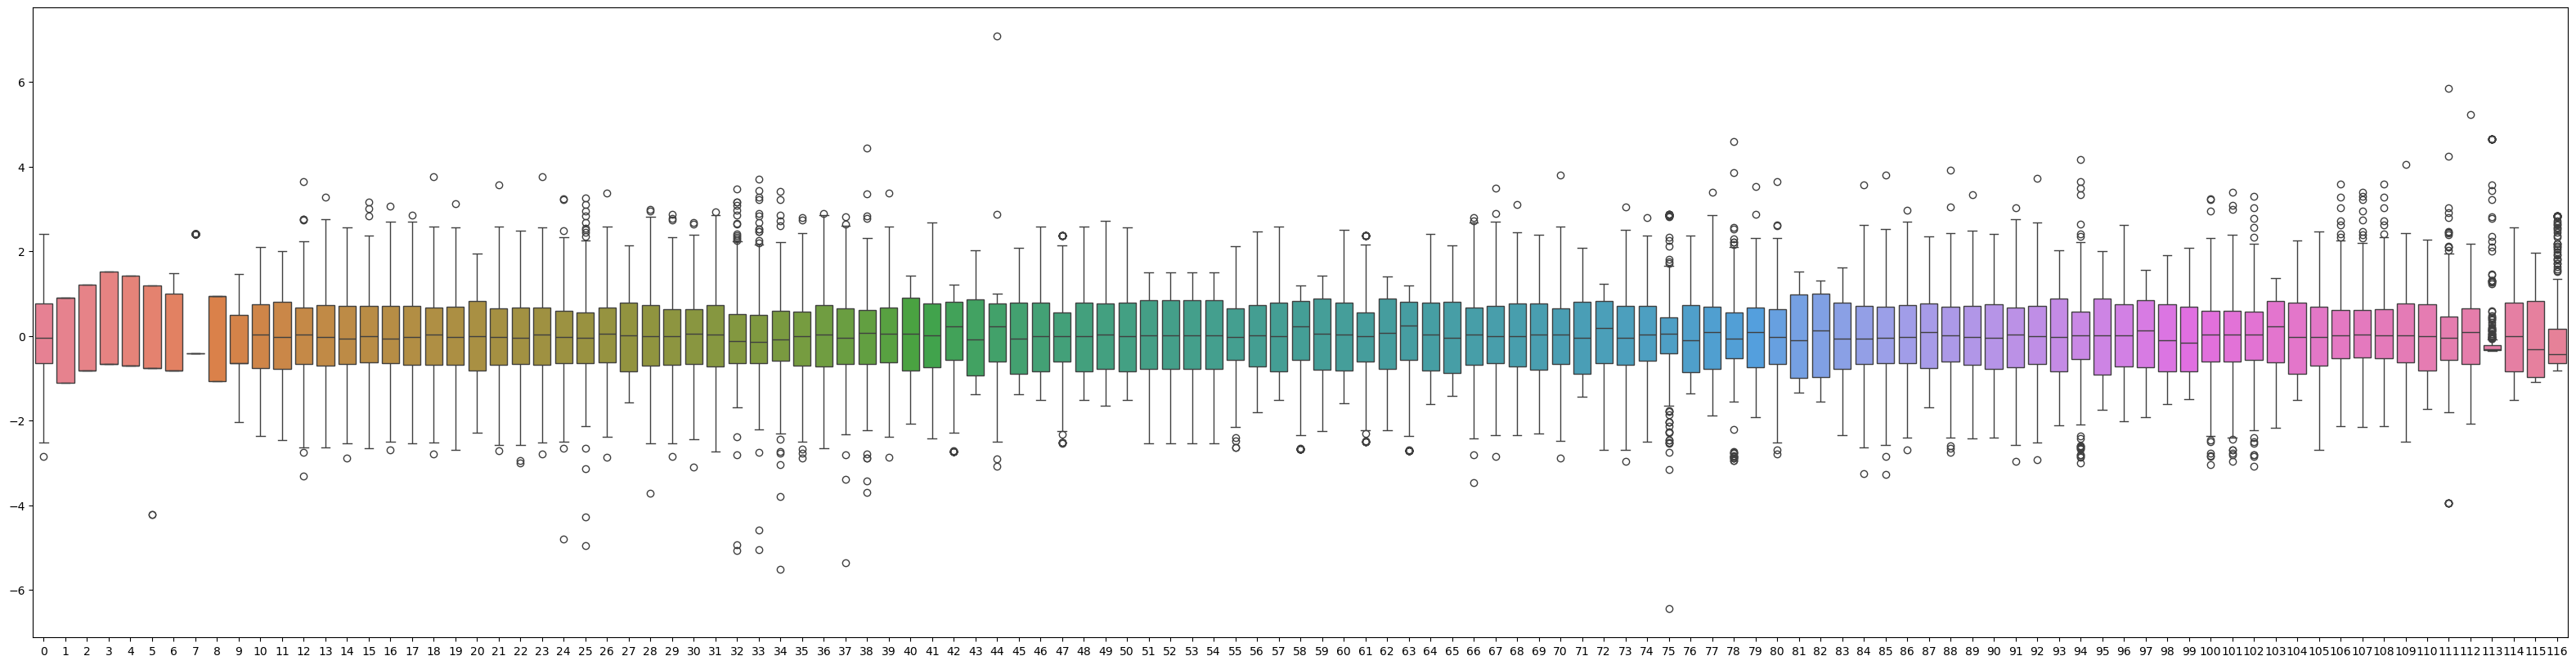

In [7]:
#  Pre-processing data to approximate its overall distribution
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
Xs = pt.fit_transform(df)
fig,ax=plt.subplots(1,figsize=(40,10)) 
sns.boxplot(data=Xs,ax=ax)

# Save power transformer
joblib.dump(pt, 'RFS_power_transformer.pkl')

['RFS_standard_scaler.pkl']

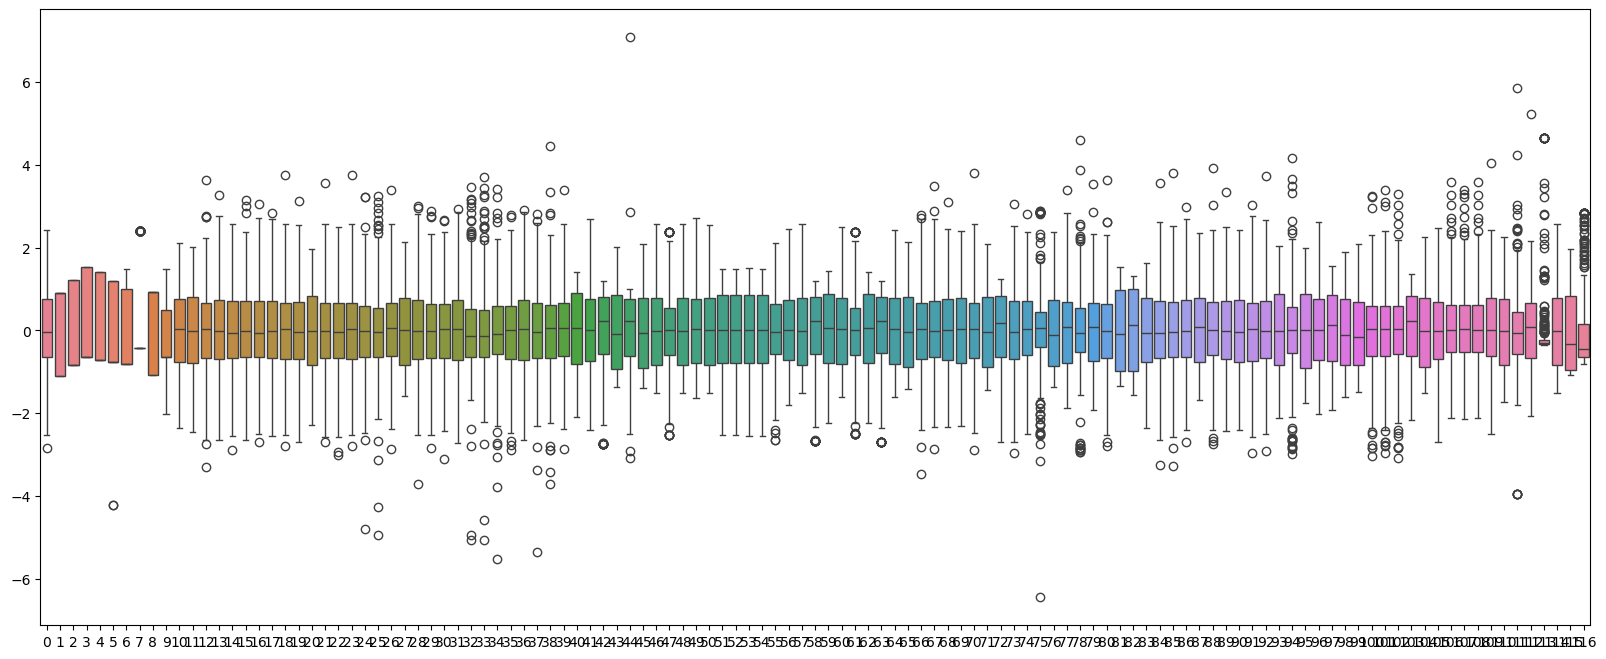

In [8]:
# Data Normalization 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xs = scaler.fit_transform(Xs)
fig,ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=Xs,ax=ax) 

# Save standard scaler
joblib.dump(scaler, 'RFS_standard_scaler.pkl')

## 2. Feature Selection

### a) Wrapper method

In [9]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

# Create a linear SVM model
svm_model = SVR(kernel='linear')

# Use RFE as a wrapper method
rfe = RFE(estimator=svm_model, n_features_to_select=1)
rfe.fit_transform(Xs, y)


# Get the feature rankings from RFE
feature_rankings = rfe.ranking_

threshold = np.sort(feature_rankings)[80]
X_rfe = Xs[:, feature_rankings <= threshold]

feature_names = df.columns
feature_selection_info = pd.DataFrame({
    'Feature': feature_names,
    'Ranking': feature_rankings,
})

feature_selection_info = feature_selection_info.sort_values(by='Ranking', ascending=True)
pd.set_option('display.max_rows', None)

# Display the DataFrame
print("Feature Selection Information:")
print(feature_selection_info)

Feature Selection Information:
                                               Feature  Ranking
73               original_gldm_LargeDependenceEmphasis        1
88                           original_glrlm_RunEntropy        2
78   original_gldm_SmallDependenceHighGrayLevelEmph...        3
105     original_glszm_SizeZoneNonUniformityNormalized        4
47                           original_glcm_Correlation        5
91                        original_glrlm_RunPercentage        6
86          original_glrlm_LongRunLowGrayLevelEmphasis        7
30                         original_firstorder_Maximum        8
38                        original_firstorder_Skewness        9
69                    original_gldm_DependenceVariance       10
6                                        Proliferation       11
32                            original_firstorder_Mean       12
44                          original_glcm_ClusterShade       13
22                   original_shape_SurfaceVolumeRatio       14
81     or

### b) Embedded Method 

In [11]:
# Create RandomForestRegressor model for feature selection 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Use Xs and y to train the model
rf.fit(Xs, y)

# Extract the importance of the features into 'importances'
importances = rf.feature_importances_

# Set a threshold to select the 80th important features
threshold = np.sort(importances)[-80]  
# Selected 100 features set to X_rf
X_rf = Xs[:, importances >= threshold]

# Connect importance with features' names
feature_names = df.columns
feature_importances = pd.DataFrame(importances, index=feature_names, columns=["importance"])
feature_importances = feature_importances.sort_values(by="importance", ascending=False)

# Save importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})
importance_df.to_csv('RFS_feature_importances.csv', index=False)

# Print top N features' names (N=10 here)
top_features = feature_importances.head(10).index.tolist()
print(top_features)

['original_firstorder_Range', 'original_firstorder_Kurtosis', 'original_glszm_ZoneEntropy', 'Age', 'original_firstorder_90Percentile', 'original_firstorder_Maximum', 'original_glszm_SizeZoneNonUniformity', 'original_firstorder_Skewness', 'original_glszm_SizeZoneNonUniformityNormalized', 'original_firstorder_Variance']


### c) Filter Method

In [12]:
# Create a ANOVA model for feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# choose 100 best features
k = 100
anova_selector = SelectKBest(f_classif, k=k)

#obtain the 100 best features
X_anova = anova_selector.fit_transform(Xs, y)

# look up the chosen features
top_features = anova_selector.get_support(indices=True)
print("Selected features:", df.columns[top_features])

Selected features: Index(['ER', 'PgR', 'TrippleNegative', 'ChemoGrade', 'HistologyType',
       'LNStatus', 'original_shape_LeastAxisLength',
       'original_shape_MajorAxisLength',
       'original_shape_Maximum2DDiameterColumn',
       'original_shape_Maximum2DDiameterRow',
       'original_shape_Maximum2DDiameterSlice',
       'original_shape_Maximum3DDiameter', 'original_shape_MeshVolume',
       'original_shape_MinorAxisLength', 'original_shape_Sphericity',
       'original_shape_SurfaceArea', 'original_shape_SurfaceVolumeRatio',
       'original_shape_VoxelVolume', 'original_firstorder_90Percentile',
       'original_firstorder_Energy', 'original_firstorder_Entropy',
       'original_firstorder_Maximum', 'original_firstorder_Median',
       'original_firstorder_Minimum', 'original_firstorder_Range',
       'original_firstorder_RootMeanSquared',
       'original_firstorder_TotalEnergy', 'original_firstorder_Uniformity',
       'original_glcm_Autocorrelation', 'original_glcm_Clust

### PCA

In [13]:
import joblib
# Using PCA for dimensionality reduction
from sklearn.decomposition import PCA
# Reduce dimensionality to 64
pca = PCA(n_components=64) ## 3. Method development
# Selected features are set to X_pca for training
X_pca = pca.fit_transform(X_rf)

# Save pca
joblib.dump(pca, 'RFS_pca.pkl')

['RFS_pca.pkl']

## 3. Method development

### a) Multilayer Preceptron Network

In [14]:
# split train data and test data
Xs_train, Xs_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=1)

In [15]:
# Create MLP network using pytorch
import torch.nn as nn

class MLPNetwork(nn.Module):
    def __init__(self, input_size=120):  
        super(MLPNetwork, self).__init__()

        # Four full connected layers
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 32)  
        self.fc4 = nn.Linear(32, 16)
        self.fc5 = nn.Linear(16, 1) # only one output neuron for regression task   

        # Using tanh activation function
        self.tanh = nn.Tanh()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.tanh(self.fc1(x)) # 1st fc layer
        x = self.dropout(x) # apply dropout after fc1
        x = self.tanh(self.fc2(x)) # 2nd fc layer
        x = self.dropout(x) # apply dropout after fc2
        x = self.tanh(self.fc3(x)) # 3rd fc layer
        x = self.dropout(x) # apply dropout after fc2
        x = self.tanh(self.fc4(x)) # 4rd fc layer
        x = self.fc5(x) # 4th fc layer
        return x

In [16]:
# Define evaluation function for precision, recall and f1_score
def compute_metrics(true_labels, predicted_labels):
    
    TP = torch.sum((predicted_labels == 1) & (true_labels == 1)).float()
    FP = torch.sum((predicted_labels == 1) & (true_labels == 0)).float()
    TN = torch.sum((predicted_labels == 0) & (true_labels == 0)).float()
    FN = torch.sum((predicted_labels == 0) & (true_labels == 1)).float()

    # set a very small value (1e-7) to make demon larger than 0
    precision = TP / (TP + FP + 1e-7)  
    recall = TP / (TP + FN + 1e-7) 
    f1_score = 2 * (precision * recall) / (precision + recall + 1e-7) 

    return precision, recall, f1_score

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error
from torch.autograd import Variable
from sklearn.model_selection import KFold
from torch.autograd import Variable

# Initial precision, recall and fi score for evaluation
total_MAE = []

# set batch size to 5
batch_size = 5
# set max epochs to 250
n_max_epochs = 250

# 5-fold cross-validation
kf = KFold(n_splits=5)

for train_idx, val_idx in kf.split(Xs_train):
    
    #  split datasets
    X_train_fold = Xs_train[train_idx]
    X_val_fold = Xs_train[val_idx]
    y_train_fold = y_train.iloc[train_idx]
    y_val_fold = y_train.iloc[val_idx]

    # Convert to pytorch tensors
    X_train_tensor = torch.tensor(X_train_fold).float()
    y_train_tensor = torch.tensor(y_train_fold.values).float() 
    X_test_tensor = torch.tensor(X_val_fold).float()
    y_test_tensor = torch.tensor(y_val_fold.values).float()

    # Initialize network and optimizer
    net = MLPNetwork(input_size=64) 
    optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.4)
    
    lossF = nn.L1Loss() # define MAE function

    for epoch in range(n_max_epochs):
        
        net.train()

        # Initialization
        running_loss = 0.0
        correct_predictions = 0
        total_predictions = 0
        all_labels = []
        all_predictions = []

        for b in range(0, len(X_train_tensor), batch_size):

            if b + batch_size > len(X_train_tensor):
                break

            # Select data for current batch
            inputs = X_train_tensor.narrow(0, b, batch_size)
            labels = y_train_tensor.narrow(0, b, batch_size)
            inputs, labels = Variable(inputs), Variable(labels)

            optimizer.zero_grad() # Reset the gradients
            outputs = net(inputs) # Predicted outputs
            outputs = outputs.squeeze()
            loss = lossF(outputs, labels) # Calculate the loss using MAE loss
            loss.backward() # perform backpropagation
            optimizer.step() # Update parameters

            # Running loss accumulation
            running_loss += loss.item()
        
        print(f"Epoch {epoch}, Loss: {running_loss}")
        
    # Test model in test dataset
    net.eval()
    test_outputs = net(X_test_tensor)
    _, predicted = torch.max(test_outputs.data, 1)
    
    # Calculate and precision, recoall and fi score|
    precision, recall, f1 = compute_metrics(y_test_tensor, predicted)
    
    # Calculate MAE loss
    MAE_loss = lossF(test_outputs.squeeze(), y_test_tensor)

    # Print test results
    print(f"Test MAE: {MAE_loss}")
    
    # Append results
    total_MAE.append(MAE_loss.detach().numpy())
    
# Save MLPNetwork
# torch.save(net.state_dict(), 'RFS_mlp_network.pth')

Epoch 0, Loss: 2843.8139610290527
Epoch 1, Loss: 2834.688362121582
Epoch 2, Loss: 2826.7930870056152
Epoch 3, Loss: 2818.207088470459
Epoch 4, Loss: 2808.9376182556152
Epoch 5, Loss: 2797.388584136963
Epoch 6, Loss: 2787.803440093994
Epoch 7, Loss: 2774.096820831299
Epoch 8, Loss: 2758.981502532959
Epoch 9, Loss: 2743.4455757141113
Epoch 10, Loss: 2725.8362464904785
Epoch 11, Loss: 2700.8312339782715
Epoch 12, Loss: 2674.6755981445312
Epoch 13, Loss: 2640.690212249756
Epoch 14, Loss: 2598.2338428497314
Epoch 15, Loss: 2555.0272102355957
Epoch 16, Loss: 2504.2276496887207
Epoch 17, Loss: 2444.8171043395996
Epoch 18, Loss: 2391.57364654541
Epoch 19, Loss: 2327.906560897827
Epoch 20, Loss: 2274.0422229766846
Epoch 21, Loss: 2218.662176132202
Epoch 22, Loss: 2161.649326324463
Epoch 23, Loss: 2108.947240829468
Epoch 24, Loss: 2058.2889251708984
Epoch 25, Loss: 2007.1634120941162
Epoch 26, Loss: 1960.5925407409668
Epoch 27, Loss: 1911.843614578247
Epoch 28, Loss: 1876.4917469024658
Epoch 29,

Epoch 238, Loss: 1022.1420397758484
Epoch 239, Loss: 1028.0042834281921
Epoch 240, Loss: 1039.5139989852905
Epoch 241, Loss: 1032.7460446357727
Epoch 242, Loss: 1047.7724103927612
Epoch 243, Loss: 1034.5405650138855
Epoch 244, Loss: 1019.5479402542114
Epoch 245, Loss: 1002.3153796195984
Epoch 246, Loss: 1003.9384055137634
Epoch 247, Loss: 1028.5353999137878
Epoch 248, Loss: 998.3595490455627
Epoch 249, Loss: 1018.126238822937
Test MAE: 18.44146728515625
Epoch 0, Loss: 2866.5602798461914
Epoch 1, Loss: 2859.3662757873535
Epoch 2, Loss: 2852.2386894226074
Epoch 3, Loss: 2844.986152648926
Epoch 4, Loss: 2836.2371520996094
Epoch 5, Loss: 2827.266342163086
Epoch 6, Loss: 2816.8186264038086
Epoch 7, Loss: 2805.463207244873
Epoch 8, Loss: 2792.587184906006
Epoch 9, Loss: 2778.5566482543945
Epoch 10, Loss: 2762.0874252319336
Epoch 11, Loss: 2739.8210220336914
Epoch 12, Loss: 2716.923671722412
Epoch 13, Loss: 2688.7143783569336
Epoch 14, Loss: 2654.8754119873047
Epoch 15, Loss: 2615.56827545166

Epoch 225, Loss: 1019.3658208847046
Epoch 226, Loss: 1028.6679344177246
Epoch 227, Loss: 1032.151626586914
Epoch 228, Loss: 1010.1100625991821
Epoch 229, Loss: 996.3399124145508
Epoch 230, Loss: 1022.4345417022705
Epoch 231, Loss: 1003.8153285980225
Epoch 232, Loss: 1023.0195055007935
Epoch 233, Loss: 1022.8042802810669
Epoch 234, Loss: 1008.5901336669922
Epoch 235, Loss: 997.0024900436401
Epoch 236, Loss: 1030.0600414276123
Epoch 237, Loss: 1011.201530456543
Epoch 238, Loss: 1007.5307006835938
Epoch 239, Loss: 996.7507915496826
Epoch 240, Loss: 1023.7432346343994
Epoch 241, Loss: 993.3969860076904
Epoch 242, Loss: 1012.3171672821045
Epoch 243, Loss: 995.2827825546265
Epoch 244, Loss: 1007.062629699707
Epoch 245, Loss: 1011.1905012130737
Epoch 246, Loss: 996.09840965271
Epoch 247, Loss: 1006.9207763671875
Epoch 248, Loss: 999.3600015640259
Epoch 249, Loss: 1029.7654218673706
Test MAE: 21.591346740722656
Epoch 0, Loss: 2913.408042907715
Epoch 1, Loss: 2906.4787101745605
Epoch 2, Loss: 2

Epoch 208, Loss: 1038.9355726242065
Epoch 209, Loss: 1054.5199851989746
Epoch 210, Loss: 1012.6144742965698
Epoch 211, Loss: 1062.8548917770386
Epoch 212, Loss: 1015.2206077575684
Epoch 213, Loss: 1019.3323249816895
Epoch 214, Loss: 1036.236014842987
Epoch 215, Loss: 1046.9293994903564
Epoch 216, Loss: 1025.0457224845886
Epoch 217, Loss: 1040.8934326171875
Epoch 218, Loss: 1029.1629467010498
Epoch 219, Loss: 1004.8952417373657
Epoch 220, Loss: 1012.8422660827637
Epoch 221, Loss: 1026.425627708435
Epoch 222, Loss: 1041.136713027954
Epoch 223, Loss: 1019.4592065811157
Epoch 224, Loss: 1018.7285151481628
Epoch 225, Loss: 1049.1710858345032
Epoch 226, Loss: 1016.2570796012878
Epoch 227, Loss: 1008.6711664199829
Epoch 228, Loss: 995.4979767799377
Epoch 229, Loss: 1002.8189079761505
Epoch 230, Loss: 1044.975980758667
Epoch 231, Loss: 967.3257575035095
Epoch 232, Loss: 1023.8308846950531
Epoch 233, Loss: 1001.3461489677429
Epoch 234, Loss: 1009.4071893692017
Epoch 235, Loss: 1007.691748142242

Epoch 196, Loss: 1096.3668241500854
Epoch 197, Loss: 1088.838357925415
Epoch 198, Loss: 1088.385980129242
Epoch 199, Loss: 1081.0743646621704
Epoch 200, Loss: 1081.7873973846436
Epoch 201, Loss: 1088.4357104301453
Epoch 202, Loss: 1083.5805950164795
Epoch 203, Loss: 1089.9180145263672
Epoch 204, Loss: 1076.5855975151062
Epoch 205, Loss: 1086.3626441955566
Epoch 206, Loss: 1081.821780204773
Epoch 207, Loss: 1084.0221304893494
Epoch 208, Loss: 1085.6435813903809
Epoch 209, Loss: 1087.2670102119446
Epoch 210, Loss: 1089.8641653060913
Epoch 211, Loss: 1097.4619102478027
Epoch 212, Loss: 1083.513331413269
Epoch 213, Loss: 1090.6228947639465
Epoch 214, Loss: 1090.252679824829
Epoch 215, Loss: 1085.792700767517
Epoch 216, Loss: 1084.7355380058289
Epoch 217, Loss: 1103.7115969657898
Epoch 218, Loss: 1087.353931427002
Epoch 219, Loss: 1083.9324836730957
Epoch 220, Loss: 1068.189329624176
Epoch 221, Loss: 1074.9752297401428
Epoch 222, Loss: 1081.9348526000977
Epoch 223, Loss: 1079.3836450576782


Epoch 184, Loss: 1048.8524951934814
Epoch 185, Loss: 1051.0300483703613
Epoch 186, Loss: 1054.2252621650696
Epoch 187, Loss: 1056.642336845398
Epoch 188, Loss: 1049.838616847992
Epoch 189, Loss: 1032.7503409385681
Epoch 190, Loss: 1045.2047004699707
Epoch 191, Loss: 1039.4564924240112
Epoch 192, Loss: 1032.6203722953796
Epoch 193, Loss: 1032.707947731018
Epoch 194, Loss: 1012.8659675121307
Epoch 195, Loss: 1058.0760354995728
Epoch 196, Loss: 1039.9347186088562
Epoch 197, Loss: 1014.9474668502808
Epoch 198, Loss: 1043.3300151824951
Epoch 199, Loss: 1028.9521207809448
Epoch 200, Loss: 1038.2001667022705
Epoch 201, Loss: 1041.1788506507874
Epoch 202, Loss: 1025.851544380188
Epoch 203, Loss: 1052.8746700286865
Epoch 204, Loss: 1033.9672746658325
Epoch 205, Loss: 1052.9546546936035
Epoch 206, Loss: 1040.2365622520447
Epoch 207, Loss: 1046.892261505127
Epoch 208, Loss: 1019.5544185638428
Epoch 209, Loss: 1029.6606431007385
Epoch 210, Loss: 1033.9329385757446
Epoch 211, Loss: 1014.17402696609

In [18]:
# Calculate the averages of MLPNetwork
avg_mae = np.mean(total_MAE)
print(f"Average MAE: {avg_mae}")

Average MAE: 20.90151596069336


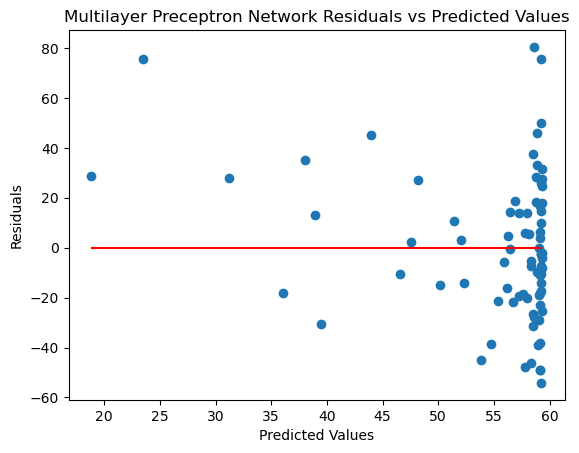

In [19]:
import matplotlib.pyplot as plt

Xs_test_tensor = torch.tensor(Xs_test).float()

# prediction
net.eval()
with torch.no_grad():
    y_pred_tensor = net(Xs_test_tensor)
    y_pred = y_pred_tensor.squeeze().numpy()

# calculate the residuals
residuals = y_test - y_pred

# plot the residuals
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Multilayer Preceptron Network Residuals vs Predicted Values')
plt.show()

### b) Multilayer Preceptron Regressor

In [20]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error

mlp_reg = MLPRegressor(hidden_layer_sizes = (100,100,100,100,100), activation = 'relu', random_state = 1, max_iter = 1000, learning_rate = 'adaptive').fit(Xs_train, y_train)

y_pred = mlp_reg.predict(Xs_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error:{mae:.2f}")

# pip install joblib 
# Save MLP Regressor Model
# joblib.dump(mlp_reg, 'RFS_mlp_reg.pkl')

Mean Absolute Error:29.15


In [21]:
from sklearn.model_selection import cross_val_score
# 5-fold cross validation
mean_scores = cross_val_score(mlp_reg, X_pca, y, cv=5, scoring = 'neg_mean_absolute_error')

# Print results
print("Mean Absolute error in each fold: ", -mean_scores)
print("Average mean absolute error: ", np.mean(-mean_scores))

Mean Absolute error in each fold:  [39.92453452 27.16059947 22.48242658 24.95981601 25.07502801]
Average mean absolute error:  27.92048091790021


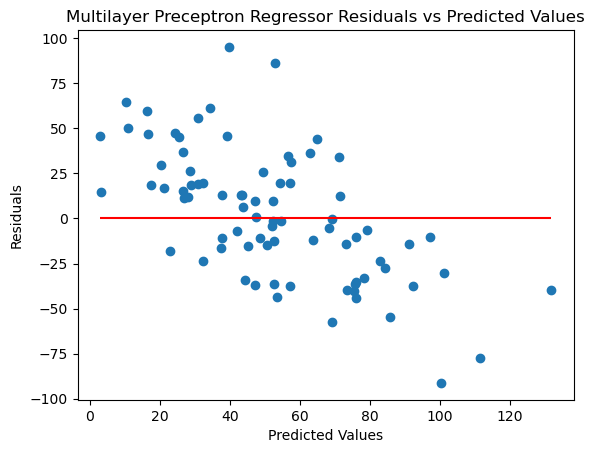

In [22]:
import matplotlib.pyplot as plt

# prediction
y_pred = mlp_reg.predict(Xs_test)

# calculate the residuals
residuals = y_test - y_pred

# plot the residuals
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Multilayer Preceptron Regressor Residuals vs Predicted Values')
plt.show()

### c) Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

regr = LinearRegression()
regr.fit(Xs_train, y_train)

y_predict = regr.predict(Xs_test)
mae = mean_absolute_error(y_test, y_predict)

print(f"Mean Absolute Error: {mae:.2f}")

# Save Linear Regression Model
# joblib.dump(regr, 'RFS_linear_reg.pkl')

Mean Absolute Error: 26.02


In [24]:
scores = cross_val_score(regr, X_pca, y, cv=5, scoring='neg_mean_absolute_error')
print("Average MAE: ", np.mean(-scores))

Average MAE:  26.882508052486838


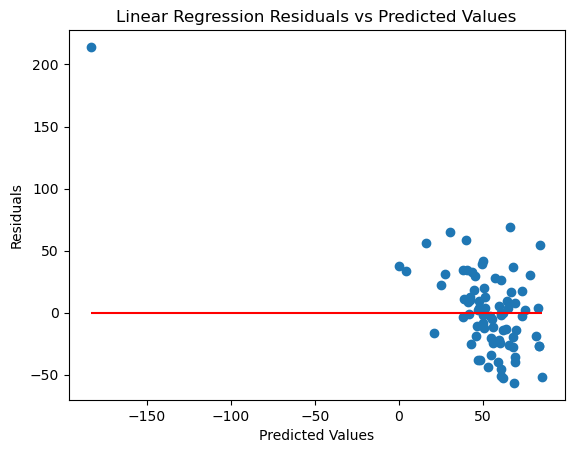

In [25]:
import matplotlib.pyplot as plt

# prediction
y_pred = regr.predict(Xs_test)

# calculate the residuals
residuals = y_test - y_pred

# plot the residuals
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Linear Regression Residuals vs Predicted Values')
plt.show()

### d) Support Vector Machine

In [26]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

svr = SVR(kernel='rbf', C=100, gamma=0.1)
svr.fit(Xs_train, y_train)

y_predict = svr.predict(Xs_test)
mae = mean_absolute_error(y_test, y_predict)
print(f"Mean Absolute Error: {mae:.2f}")

# Save SVM Model
# joblib.dump(svr, 'RFS_svr.pkl')

Mean Absolute Error: 21.67


In [27]:
#5-fold cross validation
mean_scores = cross_val_score(svr, X_pca, y, cv=5, scoring = 'neg_mean_absolute_error')
print("Mean absolute error in each fold: ", -mean_scores)
print("Average mean absolute error: ", np.mean(-mean_scores))

Mean absolute error in each fold:  [42.95174525 22.56485833 12.1617121  22.94908573 13.98936641]
Average mean absolute error:  22.923353563068762


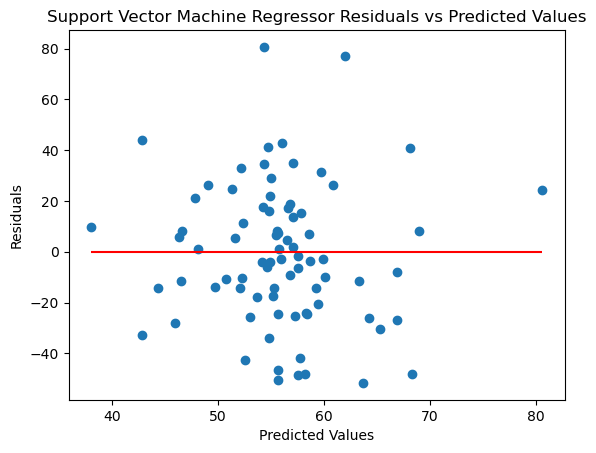

In [28]:
import matplotlib.pyplot as plt

# prediction
y_pred = svr.predict(Xs_test)

# calculate the residuals
residuals = y_test - y_pred

# plot the residuals
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Support Vector Machine Regressor Residuals vs Predicted Values')
plt.show()

### e) Decision Tree

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_absolute_error

tree_reg = DecisionTreeRegressor(max_depth=5)
tree_reg.fit(Xs_train, y_train)

y_predict = tree_reg.predict(Xs_test)
mae = mean_absolute_error(y_test, y_predict)

scores = cross_val_score(tree_reg, X_pca, y, cv=5, scoring='neg_mean_absolute_error')
print("Mean absolute error in each fold: ", -scores)
print("Average mean absolute error: ", np.mean(-scores))

# Save Decision Tree
# joblib.dump(tree_reg, 'RFS_tree_reg.pkl')

Mean absolute error in each fold:  [43.37235015 22.42687813 16.24990785 27.71429477 19.98965814]
Average mean absolute error:  25.95061780590054


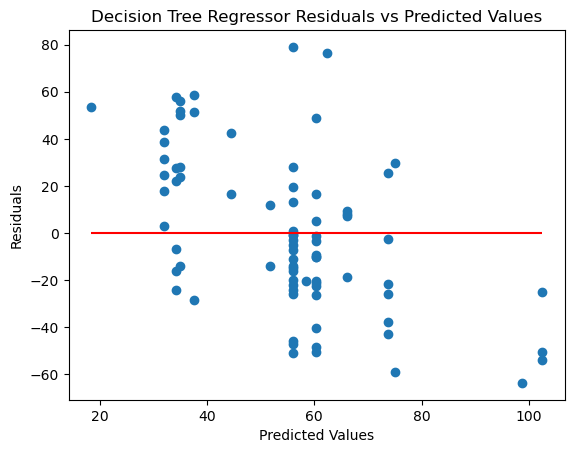

In [30]:
import matplotlib.pyplot as plt

# prediction
y_pred = tree_reg.predict(Xs_test)

# calculate the residuals
residuals = y_test - y_pred

# plot the residuals
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Decision Tree Regressor Residuals vs Predicted Values')
plt.show()

### f) Random Forest Regressor

Mean absolute error in each fold:  [43.57227083 20.04273958 12.15284375 25.64108333 14.94591667]
Average mean absolute error:  23.270970833333333


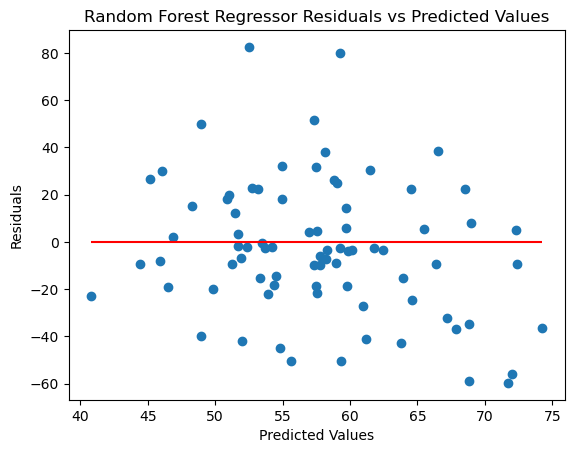

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt


# Create a Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(Xs_train, y_train.ravel())

# Make predictions on the test data
y_pred = rf_model.predict(Xs_test)
mae = mean_absolute_error(y_test, y_pred)

# Save Random Forest Regressor
joblib.dump(rf_model, 'RFS_rf_reg.pkl')

scores = cross_val_score(rf_model, X_pca, y, cv=5, scoring='neg_mean_absolute_error')
print("Mean absolute error in each fold: ", -scores)
print("Average mean absolute error: ", np.mean(-scores))

# calculate the residuals
residuals = y_test - y_pred

# plot the residuals
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Random Forest Regressor Residuals vs Predicted Values')
plt.show()